# python复杂网络分析库 NetworkX 

`NetworkX` 是一个用 Python 语言开发的图论与复杂网络建模工具，内置了常用的图与复杂网络分析算法，可以方便的进行复杂网络数据分析、仿真建模等工作。`networkx`支持创建简单无向图、有向图和多重图（multigraph）；内置许多标准的图论算法，节点可为任意数据；支持任意的边值维度，功能丰富，简单易用。

In [3]:
import networkx as nx
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 无向图

nodes: [1, 2, 3]
edges: [(2, 3)]
number of edges: 1


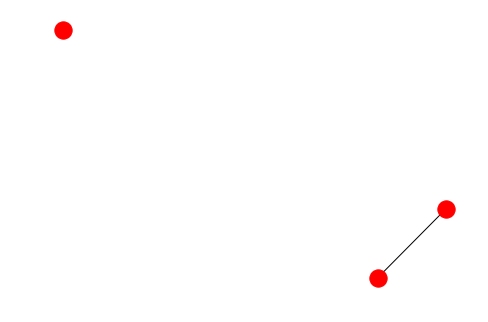

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()  # 建立一个空的无向图G
G.add_node(1)  # 添加一个节点1
G.add_edge(2, 3)  # 添加一条边 2-3（隐含着添加了两个节点 2、3）
G.add_edge(3, 2)  # 对于无向图，边 3-2 与边 2-3 被认为是一条边
print("nodes:", G.nodes())  # 输出全部的节点： [1, 2, 3]
print("edges:", G.edges())  # 输出全部的边：[(2, 3)]
print("number of edges:", G.number_of_edges())  # 输出边的数量：1
nx.draw(G)
plt.savefig("wuxiangtu.png")
plt.show()

### 加环

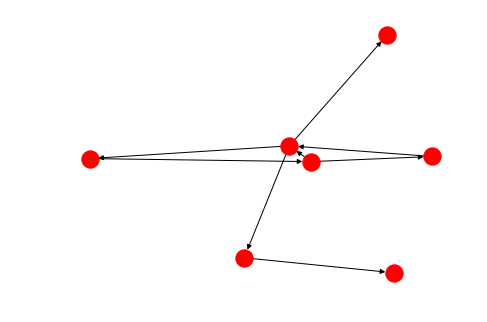

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_node(1)
G.add_node(2)  # 加点
G.add_nodes_from([3, 4, 5, 6])  # 加点集合
G.add_cycle([1, 2, 3, 4])  # 加环
G.add_edge(1, 3)
G.add_edges_from([(3, 5), (3, 6), (6, 7)])  # 加边集合
nx.draw(G)
plt.savefig("youxiangtu.png")
plt.show()

## 有向图

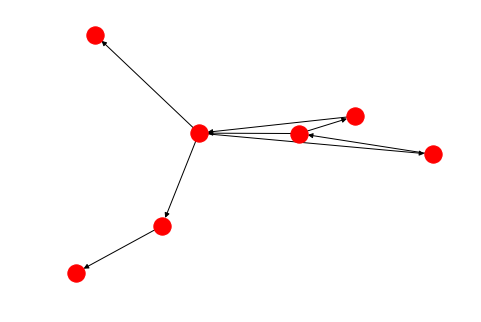

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_node(1)
G.add_node(2)
G.add_nodes_from([3, 4, 5, 6])
G.add_cycle([1, 2, 3, 4])
G.add_edge(1, 3)
G.add_edges_from([(3, 5), (3, 6), (6, 7)])
nx.draw(G)
plt.savefig("youxiangtu.png")
plt.show()

## 有向图和无向图可以互相转换，使用函数：
- `Graph.to_undirected()`
- `Graph.to_directed()`

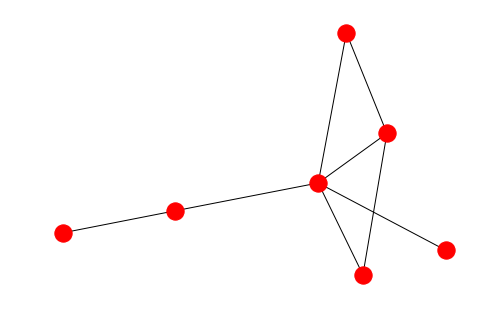

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_node(1)
G.add_node(2)
G.add_nodes_from([3, 4, 5, 6])
G.add_cycle([1, 2, 3, 4])
G.add_edge(1, 3)
G.add_edges_from([(3, 5), (3, 6), (6, 7)])
G = G.to_undirected()
nx.draw(G)
plt.savefig("wuxiangtu.png")
plt.show()

### 注意区分以下两例

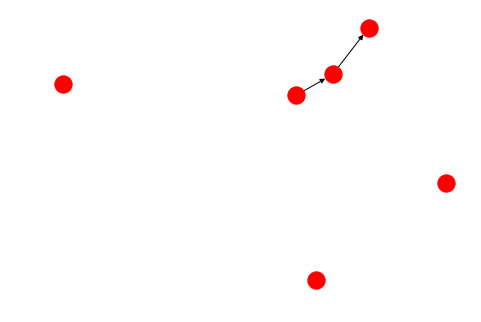

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

road_nodes = {'a': 1, 'b': 2, 'c': 3}
#road_nodes = {'a':{1:1}, 'b':{2:2}, 'c':{3:3}}
road_edges = [('a', 'b'), ('b', 'c')]

G.add_nodes_from(iter(road_nodes.items()))
G.add_edges_from(road_edges)

nx.draw(G)
plt.savefig("youxiangtu.png")
plt.show()

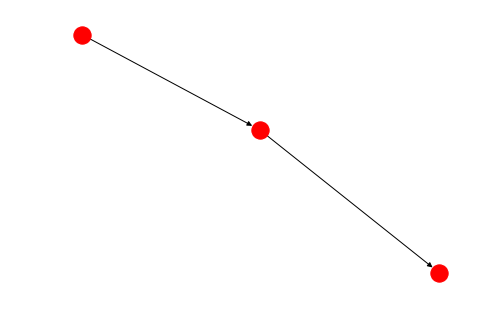

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

#road_nodes = {'a': 1, 'b': 2, 'c': 3}
road_nodes = {'a': {1: 1}, 'b': {2: 2}, 'c': {3: 3}}
road_edges = [('a', 'b'), ('b', 'c')]

G.add_nodes_from(iter(road_nodes.items()))
G.add_edges_from(road_edges)

nx.draw(G)
plt.savefig("youxiangtu.png")
plt.show()

## 加权图

有向图和无向图都可以给边赋予权重，用到的方法是 `add_weighted_edges_from`，它接受$1$个或多个三元组`[u,v,w]`作为参数，其中`u`是起点，`v`是终点，`w`是权重。

{}
{'weight': 3.5}
{'weight': 7.0}


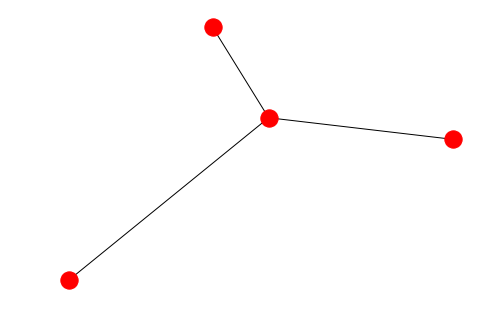

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()  # 建立一个空的无向图G
G.add_edge(2, 3)  # 添加一条边2-3（隐含着添加了两个节点2、3）
G.add_weighted_edges_from([(3, 4, 3.5), (3, 5, 7.0)])  # 对于无向图，边3-2与边2-3被认为是一条边

print(G.get_edge_data(2, 3))
print(G.get_edge_data(3, 4))
print(G.get_edge_data(3, 5))

nx.draw(G)
plt.savefig("wuxiangtu.png")
plt.show()

## 经典图论算法计算
### 计算1：求无向图的任意两点间的最短路径

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

# 计算 1：求无向图的任意两点间的最短路径
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (1, 4), (1, 5), (4, 5), (4, 6), (5, 6)])
path = nx.all_pairs_shortest_path(G)

In [23]:
list(path)[1]

(2,
 {2: [2],
  1: [2, 1],
  3: [2, 1, 3],
  4: [2, 1, 4],
  5: [2, 1, 5],
  6: [2, 1, 4, 6]})

### 计算2：找图中两个点的最短路径

In [24]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
G.add_edge(1, 2)
G.add_edge(3, 4)
try:
    n = nx.shortest_path_length(G, 1, 4)
    print(n)
except nx.NetworkXNoPath:
    print('No path')

No path


## 强连通、弱连通
- **强连通**：有向图中任意两点`v1`、`v2`间存在`v1`到`v2`的路径（path）及`v2`到`v1`的路径。
- **弱联通**：将有向图的所有的有向边替换为无向边，所得到的图称为原图的基图。如果一个有向图的基图是连通图，则有向图是弱连通图。

### 例1：弱连通

{0, 1, 2, 3, 7, 8}
[6]


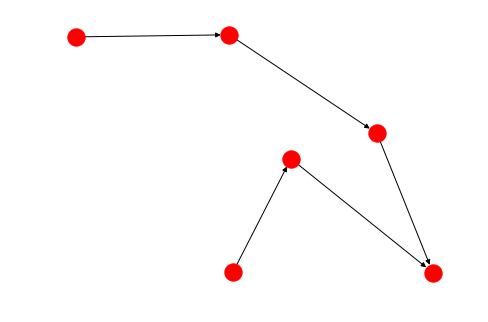

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
#G = nx.path_graph(4, create_using=nx.Graph())
# 0 1 2 3
G = nx.path_graph(
    4, create_using=nx.DiGraph())  # 默认生成节点0 1 2 3，生成有向变0->1,1->2,2->3
G.add_path([7, 8, 3])  # 生成有向边：7->8->3

for c in nx.weakly_connected_components(G):
    print(c)

print([
    len(c)
    for c in sorted(nx.weakly_connected_components(G), key=len, reverse=True)
])

nx.draw(G)
plt.savefig("youxiangtu.png")
plt.show()

### 例2：强连通

<generator object strongly_connected_components at 0x0000017E5F4F89E8>
<class 'generator'>
[{8, 1, 2, 3}, {0}]


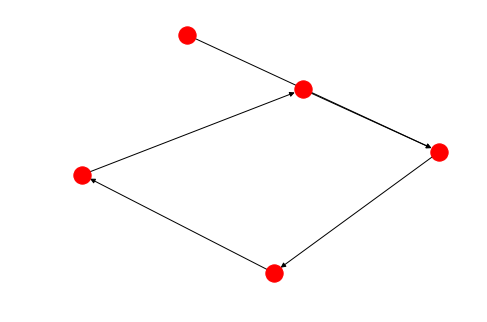

In [26]:
import networkx as nx
import matplotlib.pyplot as plt
#G = nx.path_graph(4, create_using=nx.Graph())
# 0 1 2 3
G = nx.path_graph(4, create_using=nx.DiGraph())
G.add_path([3, 8, 1])

# for c in nx.strongly_connected_components(G):
#    print c
#
# print [len(c) for c in sorted(nx.strongly_connected_components(G), key=len, reverse=True)]

con = nx.strongly_connected_components(G)
print(con)
print(type(con))
print(list(con))

nx.draw(G)
plt.savefig("youxiangtu.png")
plt.show()

## 子图

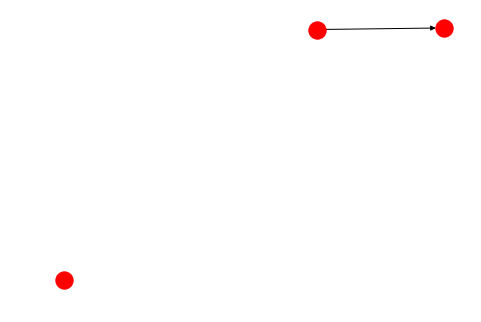

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()
G.add_path([5, 6, 7, 8])
sub_graph = G.subgraph([5, 6, 8])
# sub_graph = G.subgraph((5, 6, 8))  #ok  一样

nx.draw(sub_graph)
plt.savefig("youxiangtu.png")
plt.show()

## 条件过滤

### 原图

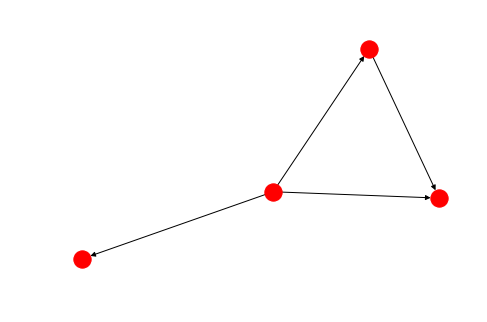

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()

road_nodes = {'a': {'id': 1}, 'b': {'id': 1}, 'c': {'id': 3}, 'd': {'id': 4}}
road_edges = [('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'd')]

G.add_nodes_from(road_nodes)
G.add_edges_from(road_edges)

nx.draw(G)
plt.savefig("youxiangtu.png")
plt.show()

### 过滤函数

['a', 'b', 'c', 'd']
[('a', 'b'), ('a', 'c'), ('c', 'd')]
a's pred  {}
b's pred  {'a': {}}
c's pred  {'a': {}}
d's pred  {'c': {}}
a's succ  {'b': {}, 'c': {}}
b's succ  {}
c's succ  {'d': {}}
d's succ  {}


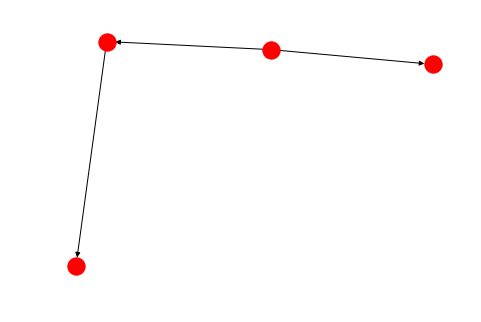

In [30]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()

road_nodes = {'a': {'id': 1}, 'b': {'id': 1}, 'c': {'id': 3}}
road_edges = [('a', 'b'), ('a', 'c'), ('c', 'd')]

G.add_nodes_from(iter(road_nodes.items()))
G.add_edges_from(road_edges)

print(G.nodes())
print(G.edges())

print("a's pred ", G.pred['a'])
print("b's pred ", G.pred['b'])
print("c's pred ", G.pred['c'])
print("d's pred ", G.pred['d'])

print("a's succ ", G.succ['a'])
print("b's succ ", G.succ['b'])
print("c's succ ", G.succ['c'])
print("d's succ ", G.succ['d'])

nx.draw(G)
plt.savefig("wuxiangtu.png")
plt.draw()

# [TikZ入门教程](http://www.fuzihao.org/blog/2015/08/11/TikZ入门教程/)

	在绘制流程框图时，有许多工具可以采用，最著名的有微软的 Viso，而开源的有 Graphviz、PGF/TikZ，Graphviz是采用 dot 语言的一个矢量图生成系统，但是不支持 LaTeX
	PGF是用于生成矢量图的一种语言，而 TikZ 则是在 Tex 环境下的一个宏包，实现了对 PGF 的封装，所以我们要使用 TikZ，就需要先配置 LaTeX环境，用TikZ绘制出来的图形效果非常好，
	原生支持所有LaTeX语法，同时能和正文的文字字体保持高度一致。 


## 第一个例子
我们先从一个最简单的例子开始：画一条直线。 　　代码如下：

我们先从一个最简单的例子开始：画一条直线。 　　代码如下：
```latex
\documentclass[tikz]{standalone}
\usepackage{tikz}
\begin{document}
    \begin{tikzpicture}
        \draw (0,0) -- (1,1);
    \end{tikzpicture}
\end{document}
```